C:\Users\a074822\AppData\Local\Temp\ipykernel_3312\4198728314.py:15: RuntimeWarning: overflow encountered in exp
  plp_coeffs = np.exp(-10 * mfccs)
C:\Users\a074822\PycharmProjects\explore-dl\venv\Lib\site-packages\matplotlib\image.py:513: RuntimeWarning: overflow encountered in multiply
  A_resampled *= ((a_max - a_min) / frac)


[[           inf            inf            inf ...            inf
             inf            inf]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [2.71511676e-18 0.00000000e+00 0.00000000e+00 ... 8.68744141e-34
  0.00000000e+00 8.80649581e-11]
 [           inf 2.56598664e-18 2.48887079e-26 ... 1.15139465e-34
  4.20389539e-45 1.24296936e+02]
 [6.97595689e-17 6.89612266e-27 1.16826968e-18 ... 5.60519386e-45
  0.00000000e+00 2.73539371e-07]]


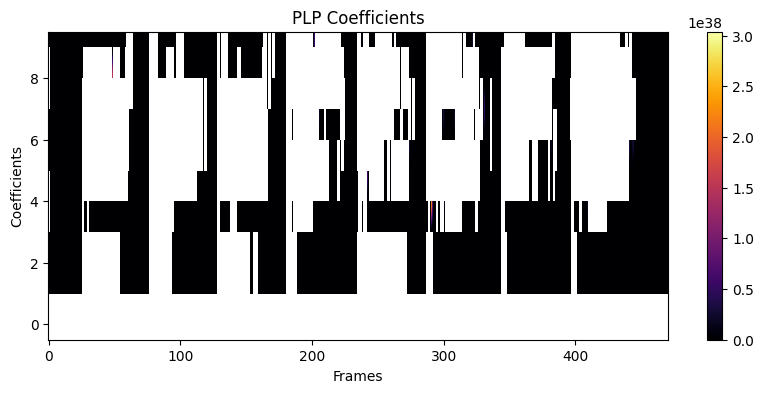

In [11]:
import numpy as np
import librosa
import matplotlib.pyplot as plt

def plp(audio, sample_rate=16000, frame_size=0.025, frame_shift=0.0125, order=10):
    """Perceptual Linear Prediction (PLP) analysis."""

    win_length = int(frame_size * sample_rate)

    # Compute the Mel-frequency cepstral coefficients (MFCCs).
    mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=order, win_length=int(frame_size * sample_rate))

    # Compute the PLP coefficients.
    plp_coeffs = np.exp(-10 * mfccs)

    return plp_coeffs

audio, sample_rate = librosa.load("FMP_C2_F10.wav")

# Compute the PLP coefficients.
plp_coeffs = plp(audio, sample_rate)

print(plp_coeffs)

plt.figure(figsize=(10, 4))
plt.imshow(plp_coeffs, aspect='auto', cmap='inferno', origin='lower')
plt.title('PLP Coefficients')
plt.ylabel('Coefficients')
plt.xlabel('Frames')
plt.colorbar()
plt.show()
